In [2]:
import pandas as pd
import numpy as np
from modelprocessing.functions import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

In [2]:
df = pd.read_pickle('/home/anuraaga/Documents/DataCodes/Projects/pricePredictor/dataset/dataset_bike/bikes_v3.pkl')

In [3]:
df

,model_year,owner,price,name,model,km_driven,mileage(kmpl)
0,2017,first owner,63500,Bajaj Avenger Cruise 220,Bajaj,17000,35
1,2016,first owner,115000,Royal Enfield Classic 350cc,Royal,50000,35
2,2012,first owner,300000,Hyosung GT250R,Hyosung,14795,30
3,2017,first owner,100000,Bajaj Dominar 400 ABS,Bajaj,28,28
5,2012,third owner,63400,KTM Duke 200cc,KTM,24561,35
...,...,...,...,...,...,...,...
7849,2011,first owner,55000,Yamaha YZF-R15 150cc,Yamaha,7000,42
7850,2015,first owner,28000,Bajaj Discover 100cc,Bajaj,80,80
7851,2016,first owner,61740,Bajaj Pulsar 180cc,Bajaj,6407,65
7852,2016,first owner,49000,Bajaj V15 150cc,Bajaj,7524,57


In [4]:
df.isna().sum()

model_year       0
owner            0
price            0
name             0
model            0
km_driven        0
mileage(kmpl)    0
dtype: int64

In [5]:
df.dtypes

model_year        int64
owner            object
price             int64
name             object
model            object
km_driven         int64
mileage(kmpl)     int64
dtype: object

In [6]:
df.describe()

,model_year,price,km_driven,mileage(kmpl)
count,7080.000000,7.080000e+03,7080.000000,7080.000000
mean,2015.099011,1.029241e+05,17347.076695,44.161441
std,3.832294,1.343467e+05,27220.405167,16.530411
min,1950.000000,0.000000e+00,0.000000,5.000000
25%,2014.000000,4.000000e+04,65.000000,35.000000
50%,2016.000000,7.000000e+04,11500.000000,40.000000
75%,2018.000000,1.200000e+05,25000.000000,57.000000
max,2021.000000,1.900000e+06,1000000.000000,96.000000


In [4]:
df['model'].unique()

array(['Bajaj', 'Royal', 'Hyosung', 'KTM', 'TVS', 'Yamaha', 'Honda', 'UM',
       'Hero', 'Suzuki', 'Husqvarna', 'Mahindra', 'Harley-Davidson',
       'Kawasaki', 'Triumph', 'Ducati', 'Benelli', 'BenelliImperiale',
       'Moto', 'Indian', 'Aprilia', 'MV'], dtype=object)

In [8]:
df.shape

(7080, 7)

In [9]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.reset_index()
cldf = df.drop('index', axis=1)

In [21]:
cldf

,model_year,owner,price,name,model,km_driven,mileage(kmpl)
0,2017,first owner,63500,Bajaj Avenger Cruise 220,Bajaj,17000,35
1,2016,first owner,115000,Royal Enfield Classic 350cc,Royal,50000,35
2,2012,first owner,300000,Hyosung GT250R,Hyosung,14795,30
3,2017,first owner,100000,Bajaj Dominar 400 ABS,Bajaj,28,28
4,2012,third owner,63400,KTM Duke 200cc,KTM,24561,35
...,...,...,...,...,...,...,...
6881,2011,first owner,39899,Hero Karizma ZMR 223cc,Hero,66780,48
6882,2011,first owner,55000,Yamaha YZF-R15 150cc,Yamaha,7000,42
6883,2016,first owner,61740,Bajaj Pulsar 180cc,Bajaj,6407,65
6884,2016,first owner,49000,Bajaj V15 150cc,Bajaj,7524,57


In [ ]:
import pickle
pickle.dump(cldf, open('/home/anuraaga/Documents/DataCodes/Projects/pricePredictor/dataset/dataset_bike/bikes_v4.pkl', 'wb'))

In [ ]:
cldf = pd.read_pickle('/home/anuraaga/Documents/Projects/pricePredictor/dataset/dataset_bike/bikes_v4.pkl')

In [ ]:
cldf.to_csv('/home/anuraaga/Documents/Projects/pricePredictor/dataset/dataset_car/motorbike.csv')

In [127]:
cldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   model_year     6886 non-null   int64 
 1   owner          6886 non-null   object
 2   price          6886 non-null   int64 
 3   name           6886 non-null   object
 4   model          6886 non-null   object
 5   km_driven      6886 non-null   int64 
 6   mileage(kmpl)  6886 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 376.7+ KB


In [165]:
cldf

,model_year,owner,price,name,model,km_driven,mileage(kmpl)
0,2017,first owner,63500,Bajaj Avenger Cruise 220,Bajaj,17000,35
1,2016,first owner,115000,Royal Enfield Classic 350cc,Royal,50000,35
2,2012,first owner,300000,Hyosung GT250R,Hyosung,14795,30
3,2017,first owner,100000,Bajaj Dominar 400 ABS,Bajaj,28,28
4,2012,third owner,63400,KTM Duke 200cc,KTM,24561,35
...,...,...,...,...,...,...,...
6881,2011,first owner,39899,Hero Karizma ZMR 223cc,Hero,66780,48
6882,2011,first owner,55000,Yamaha YZF-R15 150cc,Yamaha,7000,42
6883,2016,first owner,61740,Bajaj Pulsar 180cc,Bajaj,6407,65
6884,2016,first owner,49000,Bajaj V15 150cc,Bajaj,7524,57


In [5]:
cldf.isna().sum()

model_year       0
owner            0
price            0
name             0
model            0
km_driven        0
mileage(kmpl)    0
dtype: int64

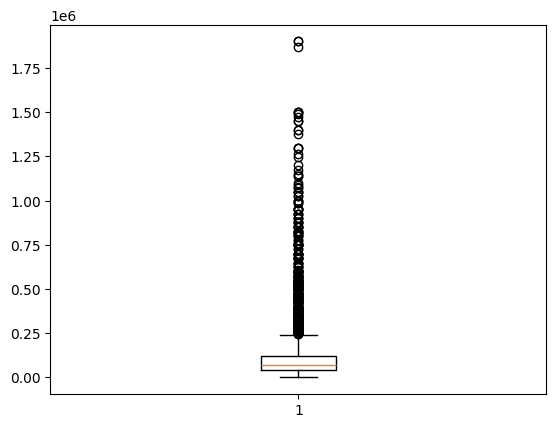

In [28]:
plt.boxplot(cldf['price']);

In [7]:
cldf[cldf['model']=='Bajaj']['owner'].unique().tolist()

['first owner', 'third owner', 'second owner', 'fourth owner or more']

In [166]:
import math
X = cldf.drop('price', axis=1)
y = cldf['price']
y = y.apply(lambda y: math.sqrt(y))

In [167]:
ohe = OneHotEncoder(sparse_output=False, drop='first', dtype=np.int32)
ohe.fit(X[['owner', 'name', 'model']])

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse_output=False)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [169]:
column_transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['owner', 'name', 'model']),
                                             remainder='passthrough')

In [ ]:
# getBestState(X, y, 0.33, column_transformer)

In [ ]:
# getBestModel(X_train, X_test, y_train, y_test, column_transformer)

In [ ]:
# run the following codes in google colab

# xg = XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', device='cuda', verbosity=0)
# param_grid = {
#     'booster': ['gbtree', 'gblinear', 'dart'],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2]
# }
# grid = GridSearchCV(xg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
# pipetest = make_pipeline(column_transformer,  grid)
# pipetest.fit(X_train, y_train)
# pipetest.named_steps['gridsearchcv'].best_params_


In [141]:
xg = XGBRegressor(booster= 'dart',
                  learning_rate= 0.2,
                  max_depth= 5,
                  verbosity=0)
pipe = make_pipeline(column_transformer, xg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['first owner', 'fourth owner or more', 'second owner',
       'third owner'], dtype=object),
                                                                            array(['Aprilia RSV4 R APRC 1000cc', 'Bajaj 4S champion 100cc',
       'Bajaj Avenger 180cc', 'Bajaj Avenger 200cc',
       'Bajaj Avenger 220cc', 'Bajaj Avenger Crui...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [149]:
import skops.io as sio 
sio.dump(pipe, '/home/anuraaga/Documents/DataCodes/Projects/pricePredictor/model_development/models/indianbikemodel_pipeline.skops')

In [154]:
import skops.io as sio 
pipe = sio.load('/home/anuraaga/Documents/DataCodes/Projects/pricePredictor/model_development/models/indianbikemodel_pipeline.skops', trusted=True)

In [70]:
X_test.iloc[0,:].tolist()

[2006, 'first owner', 'Hero Super Splendor 125cc', 'Hero', 19000, 75]

In [155]:
pipe.score(X_train, y_train)


0.9417211316796248

In [156]:
pipe.score(X_test, y_test)

0.9121203428340261

In [157]:
y_train

5730    147.986486
3575    483.153185
853     324.037035
3746    911.043358
5243    412.310563
           ...    
2181    197.484177
2409    331.662479
2033    212.132034
1364    430.116263
4547    213.307290
Name: price, Length: 5508, dtype: float64

In [81]:
cldf

,model_year,owner,price,name,model,km_driven,mileage(kmpl)
0,2017,first owner,63500,Bajaj Avenger Cruise 220,Bajaj,17000,35
1,2016,first owner,115000,Royal Enfield Classic 350cc,Royal,50000,35
2,2012,first owner,300000,Hyosung GT250R,Hyosung,14795,30
3,2017,first owner,100000,Bajaj Dominar 400 ABS,Bajaj,28,28
4,2012,third owner,63400,KTM Duke 200cc,KTM,24561,35
...,...,...,...,...,...,...,...
6881,2011,first owner,39899,Hero Karizma ZMR 223cc,Hero,66780,48
6882,2011,first owner,55000,Yamaha YZF-R15 150cc,Yamaha,7000,42
6883,2016,first owner,61740,Bajaj Pulsar 180cc,Bajaj,6407,65
6884,2016,first owner,49000,Bajaj V15 150cc,Bajaj,7524,57


In [93]:
pipe.predict(pd.DataFrame([cldf.drop('price', axis=1).iloc[6881,:].tolist()], columns=['model_year', 'owner', 'name', 'model', 'km_driven', 'mileage(kmpl)']))

array([23095.297], dtype=float32)

In [158]:
y_pred = pipe.predict(X_test)

In [176]:
X_test.iloc[:, 0].shape

(1378,)

In [178]:
y_test.shape

(1378,)

(array([1083.,  129.,   21.,   16.,    8.,    6.,    2.,    6.,    2.,
           2.]),
 array([  15567.625   ,  149422.515625,  283277.40625 ,  417132.28125 ,
         550987.1875  ,  684842.0625  ,  818696.9375  ,  952551.8125  ,
        1086406.75    , 1220261.625   , 1354116.5     ]),
 <BarContainer object of 10 artists>)

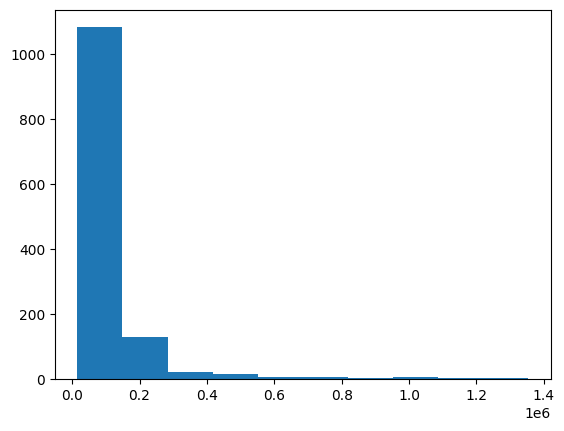

In [110]:
plt.hist(y_pred)

In [144]:
df[df['name']=='Hero Achiever 150cc']

,model_year,owner,price,name,model,km_driven,mileage(kmpl)
32,2019,first owner,48000,Hero Achiever 150cc,Hero,15000,45
2863,2012,second owner,15000,Hero Achiever 150cc,Hero,32000,45
3994,2017,first owner,35000,Hero Achiever 150cc,Hero,14999,45
4833,2018,first owner,42000,Hero Achiever 150cc,Hero,1999,45


In [148]:
(pipe.predict(pd.DataFrame([[2017, 'first owner', 'Hero Achiever 150cc', 'Hero', 20000, 45]], columns=['model_year', 'owner', 'name', 'model', 'km_driven', 'mileage(kmpl)'])))**2

array([51484.094], dtype=float32)